In [ ]:
# Main Notebook

In [1]:
#Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import calendar

import warnings
warnings.filterwarnings('ignore')



In [2]:
#Read in CSV file
egg_data = pd.read_csv("Resources/USDA_Eggs_2024.csv")

#Create Dataframe
egg_data

,office_name,office_code,office_city,office_state,report_begin_date,report_end_date,published_date,commodity,slug_id,slug_name,...,type,condition,quality_grade,package_size,price_unit,environment,price_avg,price_min,price_max,store_count
0,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Jumbo White,Fresh,A,12,Per Carton,Conventional,2.98,2.98,2.98,40
1,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Jumbo White,Fresh,NaN,12,Per Carton,Conventional,2.98,2.98,2.99,61
2,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Jumbo White,Fresh,A,12,Per Carton,Conventional,2.99,2.99,2.99,21
3,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Medium White,Fresh,NaN,12,Per Carton,Conventional,2.99,2.99,2.99,296
4,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Egg Nog,Fresh,Ungraded/Other,64 oz,Per Carton,Conventional,5.88,3.99,5.99,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,1/13/2024,1/19/2024,1/19/2024 0:00,Eggs,2757,AMS_2757,...,BROWN LARGE,Fresh,No Grade,NaN,Per Carton,"Cage-Free, USDA Organic",2.83,2.50,3.49,327
2513,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,1/13/2024,1/19/2024,1/19/2024 0:00,Eggs,2757,AMS_2757,...,WHITE LARGE,Fresh,No Grade,NaN,Per Carton,Nutritionally Enhanced (Omega-3),2.64,2.49,2.66,97
2514,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,1/13/2024,1/19/2024,1/19/2024 0:00,Eggs,2757,AMS_2757,...,WHITE LARGE,Fresh,No Grade,NaN,Per Carton,"Cage-Free, USDA Organic",2.55,1.99,3.50,124
2515,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,1/13/2024,1/19/2024,1/19/2024 0:00,Eggs,2757,AMS_2757,...,WHITE LARGE,Fresh,No Grade,NaN,Per Carton,"Cage-Free, USDA Organic",1.99,1.99,1.99,3


In [3]:
# select the fields needed for the analysis
egg_data_df = egg_data[['report_date','region','type','quality_grade','package_size','environment','price_avg', 'store_count','section']]

# filter the rows needed for the analysis - shell eggs only
egg_data_df = egg_data_df.loc[(egg_data_df['section'] == 'Shell Egg')]
  
egg_data_df

,report_date,region,type,quality_grade,package_size,environment,price_avg,store_count,section
0,12/23/2024,Southeast,Jumbo White,A,12,Conventional,2.98,40,Shell Egg
1,12/23/2024,NATIONAL,Jumbo White,NaN,12,Conventional,2.98,61,Shell Egg
2,12/23/2024,Midwest,Jumbo White,A,12,Conventional,2.99,21,Shell Egg
3,12/23/2024,NATIONAL,Medium White,NaN,12,Conventional,2.99,296,Shell Egg
6,12/23/2024,Northwest,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,Shell Egg
...,...,...,...,...,...,...,...,...,...
2511,1/19/2024,NorthEast,BROWN LARGE,No Grade,NaN,USDA Organic,5.99,22,Shell Egg
2512,1/19/2024,SouthEast,BROWN LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.83,327,Shell Egg
2513,1/19/2024,MidWest,WHITE LARGE,No Grade,NaN,Nutritionally Enhanced (Omega-3),2.64,97,Shell Egg
2514,1/19/2024,MidWest,WHITE LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.55,124,Shell Egg


In [4]:
# change the report date from a string to a date field to support proper sorting of dates for reporting
egg_data_df['report_date'] = pd.to_datetime(egg_data_df['report_date'], format='%m/%d/%Y')
egg_data_df['report_month'] = egg_data_df['report_date'].dt.month

egg_data_df

,report_date,region,type,quality_grade,package_size,environment,price_avg,store_count,section,report_month
0,2024-12-23,Southeast,Jumbo White,A,12,Conventional,2.98,40,Shell Egg,12
1,2024-12-23,NATIONAL,Jumbo White,NaN,12,Conventional,2.98,61,Shell Egg,12
2,2024-12-23,Midwest,Jumbo White,A,12,Conventional,2.99,21,Shell Egg,12
3,2024-12-23,NATIONAL,Medium White,NaN,12,Conventional,2.99,296,Shell Egg,12
6,2024-12-23,Northwest,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,Shell Egg,12
...,...,...,...,...,...,...,...,...,...,...
2511,2024-01-19,NorthEast,BROWN LARGE,No Grade,NaN,USDA Organic,5.99,22,Shell Egg,1
2512,2024-01-19,SouthEast,BROWN LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.83,327,Shell Egg,1
2513,2024-01-19,MidWest,WHITE LARGE,No Grade,NaN,Nutritionally Enhanced (Omega-3),2.64,97,Shell Egg,1
2514,2024-01-19,MidWest,WHITE LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.55,124,Shell Egg,1


In [5]:
#clean up region data
egg_data_df['region'] = egg_data_df['region'].replace({'NATIONAL': 'National', 'Northeast': 'NorthEast',
                                     'Southeast': 'SouthEast', 'Midwest': 'MidWest',
                                     'Southcentral': 'SouthCentral', 'Northwest': 'NorthWest',
                                     'Southwest': 'SouthWest'})
egg_data_df

,report_date,region,type,quality_grade,package_size,environment,price_avg,store_count,section,report_month
0,2024-12-23,SouthEast,Jumbo White,A,12,Conventional,2.98,40,Shell Egg,12
1,2024-12-23,National,Jumbo White,NaN,12,Conventional,2.98,61,Shell Egg,12
2,2024-12-23,MidWest,Jumbo White,A,12,Conventional,2.99,21,Shell Egg,12
3,2024-12-23,National,Medium White,NaN,12,Conventional,2.99,296,Shell Egg,12
6,2024-12-23,NorthWest,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,Shell Egg,12
...,...,...,...,...,...,...,...,...,...,...
2511,2024-01-19,NorthEast,BROWN LARGE,No Grade,NaN,USDA Organic,5.99,22,Shell Egg,1
2512,2024-01-19,SouthEast,BROWN LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.83,327,Shell Egg,1
2513,2024-01-19,MidWest,WHITE LARGE,No Grade,NaN,Nutritionally Enhanced (Omega-3),2.64,97,Shell Egg,1
2514,2024-01-19,MidWest,WHITE LARGE,No Grade,NaN,"Cage-Free, USDA Organic",2.55,124,Shell Egg,1


In [6]:
# calculate the weighted average price at the regional level

# create a field to house the total cost of eggs on each row 
egg_data_df['total_price'] = egg_data_df['store_count'] * egg_data_df['price_avg']

# sum the total price and total store count numbers by report date and region
egg_data_sum_df = egg_data_df.groupby(['report_month','region'])[['store_count','total_price']].sum()

# create a new field for the average price by report date and region, round to 2 decimal points
egg_data_sum_df['reg_avg_price'] = round((egg_data_sum_df['total_price']/egg_data_sum_df['store_count']),2)

# reset the index
egg_data_sum_df.reset_index(inplace=True)
egg_data_sum_df

,report_month,region,store_count,total_price,reg_avg_price
0,1,MidWest,614,1815.50,2.96
1,1,National,9993,30720.73,3.07
2,1,NorthEast,2914,7967.94,2.73
3,1,NorthWest,1364,3525.94,2.58
4,1,SouthCentral,790,2045.90,2.59
...,...,...,...,...,...
88,12,NorthEast,3681,20845.03,5.66
89,12,NorthWest,389,2236.22,5.75
90,12,SouthCentral,842,2498.96,2.97
91,12,SouthEast,1564,4900.92,3.13


In [7]:
# pare the table down to the fields needed for plotting

egg_data_sum_avgprice_df = egg_data_sum_df[['report_month','region','reg_avg_price']]

egg_data_sum_avgprice_df

,report_month,region,reg_avg_price
0,1,MidWest,2.96
1,1,National,3.07
2,1,NorthEast,2.73
3,1,NorthWest,2.58
4,1,SouthCentral,2.59
...,...,...,...
88,12,NorthEast,5.66
89,12,NorthWest,5.75
90,12,SouthCentral,2.97
91,12,SouthEast,3.13


In [9]:
egg_data_sum_avgprice_dropnat_df = egg_data_sum_avgprice_df.loc[(egg_data_sum_avgprice_df['region']!= 'National')]
egg_data_sum_avgprice_dropnat_df

,report_month,region,reg_avg_price
0,1,MidWest,2.96
2,1,NorthEast,2.73
3,1,NorthWest,2.58
4,1,SouthCentral,2.59
5,1,SouthEast,3.33
...,...,...,...
88,12,NorthEast,5.66
89,12,NorthWest,5.75
90,12,SouthCentral,2.97
91,12,SouthEast,3.13


In [12]:
# use the pivot function to create a matrix of average weighted prices by region and date for plotting
egg_data_avgprice_plot = egg_data_sum_avgprice_df.pivot(index='report_month', columns='region', values='reg_avg_price')

egg_data_avgprice_plot

region,Alaska,Hawaii,MidWest,National,NorthEast,NorthWest,SouthCentral,SouthEast,SouthWest
report_month,,,,,,,,,
1,NaN,NaN,2.96,3.07,2.73,2.58,2.59,3.33,3.85
2,NaN,NaN,2.69,3.33,3.42,2.58,2.87,3.86,3.08
3,4.81,NaN,2.69,3.16,3.50,1.99,3.06,3.18,4.04
4,NaN,NaN,3.27,3.44,3.60,2.99,2.62,3.54,3.77
5,1.99,NaN,2.47,3.08,3.66,2.92,2.69,3.18,2.89
6,3.99,NaN,2.71,3.20,3.39,2.80,2.76,3.45,3.25
7,2.00,NaN,3.02,2.91,3.20,1.72,2.67,3.06,3.22
8,3.99,NaN,2.65,2.90,3.35,2.11,2.90,3.15,2.81
9,4.74,4.49,4.14,4.70,4.95,4.79,4.76,4.47,4.97


In [13]:
egg_data_final_plot = egg_data_avgprice_plot.dropna(axis='columns')
egg_data_final_plot_dropnat = egg_data_avgprice_plot.drop('National', axis=1)
egg_data_final_plot_dropnat

region,Alaska,Hawaii,MidWest,NorthEast,NorthWest,SouthCentral,SouthEast,SouthWest
report_month,,,,,,,,
1,NaN,NaN,2.96,2.73,2.58,2.59,3.33,3.85
2,NaN,NaN,2.69,3.42,2.58,2.87,3.86,3.08
3,4.81,NaN,2.69,3.50,1.99,3.06,3.18,4.04
4,NaN,NaN,3.27,3.60,2.99,2.62,3.54,3.77
5,1.99,NaN,2.47,3.66,2.92,2.69,3.18,2.89
6,3.99,NaN,2.71,3.39,2.80,2.76,3.45,3.25
7,2.00,NaN,3.02,3.20,1.72,2.67,3.06,3.22
8,3.99,NaN,2.65,3.35,2.11,2.90,3.15,2.81
9,4.74,4.49,4.14,4.95,4.79,4.76,4.47,4.97


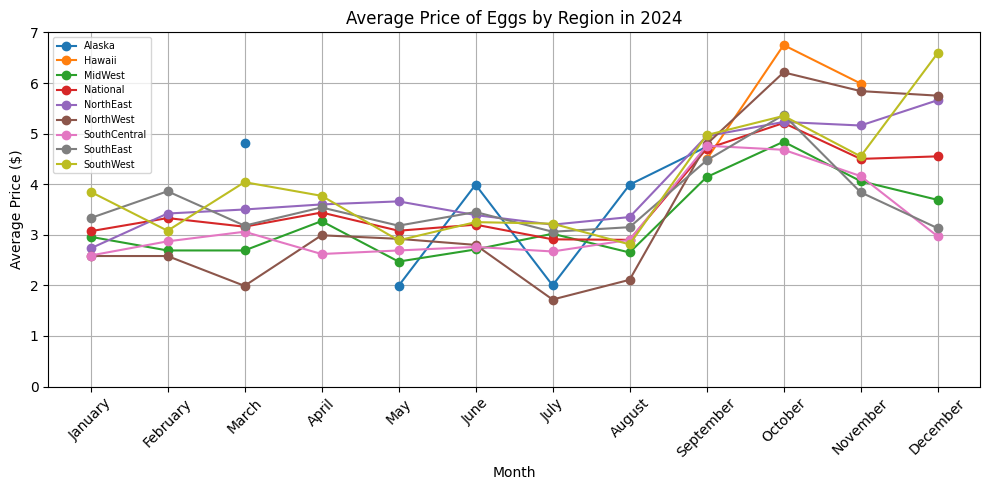

In [15]:
# create a line graph showing a line for each region using pandas
x_axis = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tick_locations = [value for value in x_axis]

ax=egg_data_avgprice_plot.plot(kind='line',
                      figsize=(10,5),
                      title='Average Price of Eggs by Region in 2024',
                      grid=True,
                      marker = 'o',
                      xlabel='Month', 
                      ylabel='Average Price ($)')
ax.set_xticks(egg_data_avgprice_plot.index)
ax.set_xticklabels(tick_locations, rotation=45)
plt.legend(fontsize='x-small')
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig("Output_files/MonthlyPricesByRegionLine.png")
plt.show()


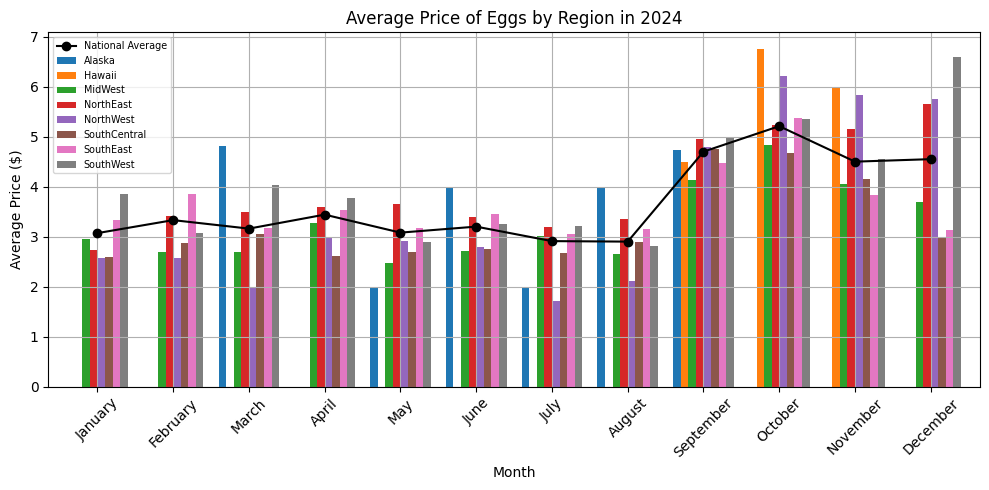

In [16]:
# create a line graph showing a line for each region using pandas
x_axis = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tick_locations = [value for value in x_axis]

ax=egg_data_final_plot_dropnat.plot(kind='bar',
                      width=0.8,
                      figsize=(10,5),
                      title='Average Price of Eggs by Region in 2024',
                      grid=True,
#                      marker = 'o',
                      xlabel='Month', 
                      ylabel='Average Price ($)')
ax.set_xticks(egg_data_final_plot_dropnat.index-1)
ax.set_xticklabels(tick_locations, rotation=45)
plt.plot(x_axis, egg_data_final_plot['National'], marker='o', label ='National Average', color = 'black')
plt.legend(fontsize='x-small')
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig("Output_files/MonthlyPricesByRegionBar.png")
plt.show()


In [ ]:
#Analysis

In [ ]:
#Limitations

In [ ]:
#Next Steps